# Linear Regression - Single Variable

In [ ]:
By using -> homeprices.csv , find out prices of homes whose area is - 3300 and 5000 square feet.

In [ ]:
how we find: calculate (delta) which is an error b/w actual data point and the data point which is predicted by linear equation.
    -> we square individual errors and sum them up and then try to minimize those.                                            
    -> we repeat procedure for all lines(orange,red,blue) and found that (blue) line giving minimum error.                     

In [ ]:
price = m * area + b   ( or y=mx + b )                                                                                       

m-slope(or coeff.) , b-intercept , area(or x) -independent var. ,                                                             
y(price)-dependent var.            # y-intercept, c-coeff.(or slope)                                                           

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


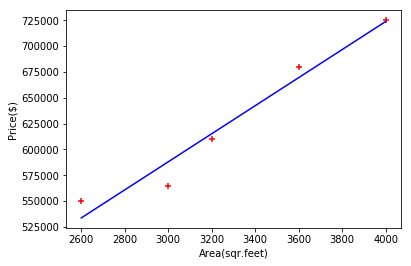

In [5]:
%matplotlib inline

plt.xlabel('Area(sqr.feet)')
plt.ylabel('Price($)')
plt.scatter(df.area, df.price, color='red',marker='+')

plt.plot(df.area, reg.predict(df[['area']]), color='blue')    # represent linear equation line 
 
# plt.show()                                                  # also in this [[]] we give --> idnependent var.

In [4]:
# Now we do linear regression

reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)        

# fit -- fitting the data means you are training the linear regression model using the available data points 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# now this regression model ready to predict the prices

reg.predict([[3300]])          # it calculated coeff.(or slope) and intercept          # 3300 sqr.feet

array([628715.75342466])

In [7]:
reg.coef_             # gives slope or coeff. ( m )       y=mx+b

array([135.78767123])

In [8]:
reg.intercept_        # intercept ( b )

180616.43835616432

In [9]:
# we can calculate  ->  y=mx+b         , gives the what we predict value earlier

135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [10]:
reg.predict([[5000]])

array([859554.79452055])

## Now we can predict Prices for ( areas.csv ) file using above predict 

In [11]:
d = pd.read_csv('areas.csv')           # imported areas file and created DF- d  
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [12]:
p = reg.predict(d)           # here we predict prices for -> d (areas)  and store in var.- p
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [13]:
d['prices'] = p           # now we create a column-> prices and assign to p 
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [14]:
d.to_csv('predictions.csv', index=False)     # it writes and create a new csv file , it also print index value so make it False 

## ------------------------------------------------------------------------------- 

#  With Multiple Variables ( Multivariate Regression )

In [ ]:
by using-> home-prices.csv  , predict or find out price of a home :  3000 sq.feet, 3 bedrooms, 40 yr old    and
                                                                       2500 sq.feet, 4 bedrooms, 5 yr old

In [ ]:
1st we look at dataset , we find there is missing value then we handle it.                                                   
we also find that the age of home is more , the price of home is low.                                                         
area and bedrooms is more , the price is more                                                                                 

In [ ]:
price = m1*area + m2*bedrooms + m3*age + b         <-- linear equation                                                       
    or     
y = m1*x1 + m2*x2 + m3*x3 + b

In [ ]:
'price' - dependent var.  and  'area, bedrooms , age'   all 3 are - independent var.(or called - features)                    
m1, m2, m3 -- are coeff. , b -- intercept

In [ ]:
Topics:
    -> Data preprocessing : Handling NA values                                                                                
    -> Linear Regression using Multiple variables                                                                              

In [15]:
df1 = pd.read_csv('home-prices.csv')
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [25]:
# Now we handle NaN value by taking median and put it there  ->  df.bedrooms.median()

import math 
median_bedroom = math.floor(df1.bedrooms.median())       # using math module - to convert float value into -> int
median_bedroom

4

In [26]:
# so by this --> Data Preprocessing step is over 

df1.bedrooms = df1.bedrooms.fillna(median_bedroom)     # fillna() -> it fills all NaN values by this median_bedroom value
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [27]:
reg1  = linear_model.LinearRegression()                     # Now we create regression then we train (or fit) our data.
reg1.fit(df1[['area','bedrooms','age']], df1.price)         # price - is target var.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
reg1.coef_               # m1, m2 , m3

array([  112.06244194, 23388.88007794, -3231.71790863])

In [29]:
reg1.intercept_          # b

221323.00186540425

In [30]:
# Now we predict the Price of home ->   3000 sq.feet, 3 bedrooms, 40 yr old

reg1.predict([[3000,3,40]])

array([498408.25158031])

In [31]:
# calculate --> m1*x1 + m2*x2 + m3*x3 + b

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540425

498408.25157402427

In [33]:
# calculate --> 2500 sq.feet, 4 bedrooms, 5 yr old

reg1.predict([[2500,4,5]])

array([578876.03748933])

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
# ax.scatter(df.area,df.bedrooms,df.age, c='r', marker='o')
# ax.set_xlabel('area')
# ax.set_ylabel('bedrooms')
# ax.set_zlabel('age')
# plt.show()

## ----------------------------------------------------------------------

# Exercise

In [ ]:
using -> hiring.csv   find out:  salary
    2yr experience , 9 test score , 6 interview score
    12yr experience , 10 test score , 10 interview score
    
In experience use -> word2number module  , to fill missing value coz it is in string  , fill -> zero
In test score -> take median to handle missing value

In [51]:
from word2number import w2n         # this converts word to number

df2 = pd.read_csv('hiring.csv')
df2

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [52]:
df2.experience = df2.experience.fillna('Zero')         # experience 
df2

,experience,test_score,interview_score,salary
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [57]:
df2.experience = df2.experience.apply(w2n.word_to_num)
df2

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [61]:
import math                                                    # median of test-score

median_test = math.floor(df2.test_score.mean())
median_test

7

In [62]:
df2.test_score = df2.test_score.fillna(median_test)         # or use -> df2['test_score(out of 10)'] 
df2

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [60]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['experience','test_score','interview_score']],df2.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
# 2yr experience , 9 test score , 6 interview score

reg2.predict([[2,9,6]])

array([53205.96797671])

In [64]:
# 12yr experience , 10 test score , 10 interview score

reg2.predict([[12,10,10]])

array([92002.18340611])

## To see the formula or calculation : y=mx+c , MSE , RMSE(RootMeanSquareError) ,

<img src='LinearRegression1.PNG'>    
<img src='LinearRegression2.PNG'>                    
<img src='LinearRegression3.PNG'> 

## ---------------------------------------------------------------------------------------------

##  Training and  Testing Data

In [ ]:
Split available dataset into Training and Testing using:                                                                       
        sklearn.model_selection.train_test_split                                                                               
        
It takes Train model 80% and remaining 20% to Test, is to check accuracy of model bcoz the model not seen these sample before.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('carprices2.csv')                    # using 'carprices2.csv' , BMW car with mileage, yr and sold price
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


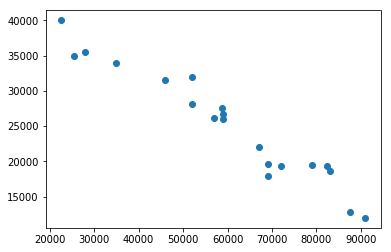

In [4]:
plt.scatter(df['Mileage'],df['Sell Price($)'])        # mileage vs sell  ,shows clear linear relationship we can draw line

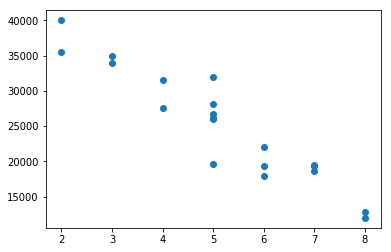

In [5]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])     # age vs sell price 

In [6]:
x = df[['Mileage','Age(yrs)']]    # independent var.
y = df['Sell Price($)']          # dependent var.

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)       # test_size = 20% (0.2) ,also we change as acc.
 
# it gives 4 parameters -- x_train , x_test , y_train , y_test  ,  ( test_size=0.2 ) will split data into train:80% & test:20%
# it selects datapoints randomly   not the 1st 80% , if we use : random_state=10, parameter in train_split method it not change

In [8]:
len(x_train)        # we can check by-> len() , total=20 datapoints , train=16, test=4

16

In [9]:
# if we check --  x_train , it selects datapoints randomly   not the 1st 80%

x_train

,Mileage,Age(yrs)
5,59000,5
19,52000,5
4,46000,4
2,57000,5
8,91000,8
1,35000,3
0,69000,6
3,22500,2
10,83000,7
9,67000,6


In [10]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()    # creating object

In [11]:
clf.fit(x_train, y_train)         # fitting data of train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
clf.predict(x_test)       # now we Predict --  test data

array([25422.04560297, 24855.81747475, 15470.34006901, 36374.5004499 ])

In [13]:
y_test      # we can check with y_test , range is similar but not exactly , so check accuracy

12    26000
13    27500
18    12800
16    35500
Name: Sell Price($), dtype: int64

In [14]:
clf.score(x_test,y_test)   # checking accuracy

# score method -- 1st predict x_test data and then compare to y_test

0.9426761585022198